In [1]:
#install graphviz for tree visualization
!pip install graphviz

notebook 5.0.0 requires nbconvert, which is not installed.
ipywidgets 6.0.0 requires widgetsnbextension~=2.0.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [3]:
#import required libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
import pandas as pd 
import numpy as np 
import io
import requests

In [5]:
#Read training Dataset 
url="https://raw.githubusercontent.com/dinasayed/mavenFirst/master/mavenFirst/PlayerFittness.csv"
df=pd.read_csv(url)
print(df)

   Practice Abid_Dietary IsMotivated IsFit
0  Moderate          Yes         Yes   Yes
1      good           No         Yes   Yes
2        No           No         Yes    No
3  Moderate           No          No    No
4  Moderate           No         Yes   Yes
5  Moderate           No         Yes   Yes
6        No          Yes          No    No
7      good          Yes          No    No


In [6]:
# Prepare your dataset 
lb = LabelEncoder() 
df['Practice_'] = lb.fit_transform(df['Practice']) 
df['Abid_Dietary_'] = lb.fit_transform(df['Abid_Dietary'] ) 
df['IsMotivated_'] = lb.fit_transform(df['IsMotivated'] )  
df['IsFit_'] = lb.fit_transform(df['IsFit'] ) 
X = df.iloc[:,4:7] 
Y = df.iloc[:,7]
print("Features in numeric form")
print(X)
print("*********************************************")
print("Label in numeric form")
print(Y)
# Prepare a testcase
X_test=[[0 for x in range(3)] for y in range(1)]
X_test[0][0]=2
X_test[0][1]=1
X_test[0][2]=1
#Train a Decision tree
d_tree = DecisionTreeClassifier(criterion='entropy')
d_tree.fit(X.astype(int), Y.astype(int))
#Test using sample test X_test
y_pred_en = d_tree.predict(X_test)
#The prediction for X-test
print("The prediction result for test case, given features are: practice is moderate, Abid_Dietary is yes and  IsMotivated is yes")
print(y_pred_en)



Features in numeric form
   Practice_  Abid_Dietary_  IsMotivated_
0          0              1             1
1          2              0             1
2          1              0             1
3          0              0             0
4          0              0             1
5          0              0             1
6          1              1             0
7          2              1             0
*********************************************
Label in numeric form
0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    0
Name: IsFit_, dtype: int64
The prediction result for test case, given features are: practice is moderate, Abid_Dietary is yes and  IsMotivated is yes
[1]


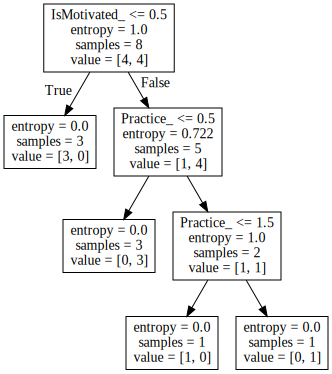

In [7]:
#Visualize the decision tree
graph = Source(export_graphviz(d_tree, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))